# Importing Lib and docs

In [ ]:
# Pandas and Numpy
import numpy as np
import pandas as pd

# Charting and plotting
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

# SKlearn packages
#from sklearn.preprocessing import MinMaxScaler
#import sklearn.metrics as metrics

# Keras and TF
#import tensorflow
#import keras
#from keras.utils import load_img, img_to_array
#from keras.models import Model
#from keras.layers import Dense, LSTM, Bidirectional, Flatten, TimeDistributed
#from keras.layers.convolutional import Conv2D, MaxPooling2D

# Ignore Warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#df_img_text = pd.read_csv('/content/drive/MyDrive/Mtech_Project/')
#df_img_text.shape

## Installing MediaPipe

In [ ]:
# installing MediaPipe
!pip install -q mediapipe==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 46.0 MB/s eta 0:00:00


In [ ]:
# download an off-the-shelf model bundle
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [ ]:
model_path = 'pose_landmarker.task'

In [ ]:
# Import the mediapipe modules and Pose Landmarker API 
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2

In [ ]:
# visualization tools
import cv2
from google.colab.patches import cv2_imshow

# Testing the pose detetion APIs

## Images

In [ ]:
# Function to preform pose marking for each image
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

In [ ]:
# Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

In [ ]:
# Load the input image.
image = mp.Image.create_from_file("/content/drive/MyDrive/Mtech_Project/Test_img.jpg")

In [ ]:
# Detect pose landmarks from the input image.
detection_result = detector.detect(image)

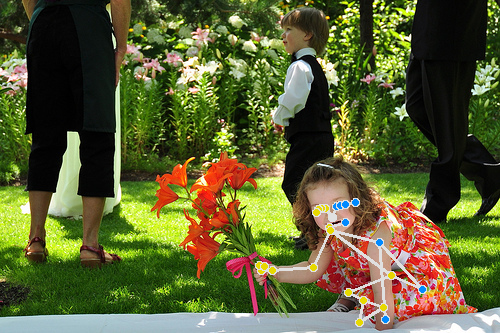

In [ ]:
#Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

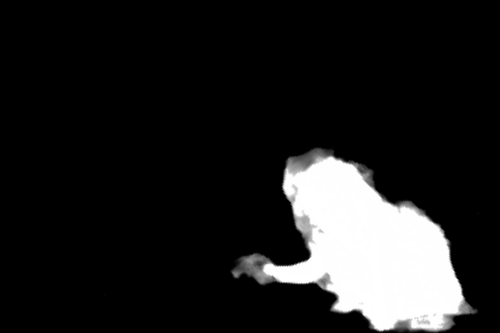

In [ ]:
# Visualize the pose segmentation mask.
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
cv2_imshow(visualized_mask)

In [ ]:
# Load the input image 2.
image_2 = mp.Image.create_from_file("/content/drive/MyDrive/Mtech_Project/Test_img_2.jpg")

In [ ]:
# Detect pose landmarks from the input image.
detection_result_2 = detector.detect(image_2)

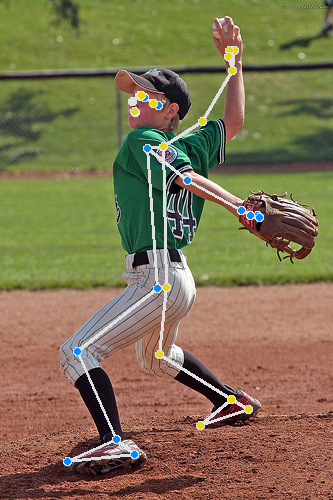

In [ ]:
#Process the detection result. In this case, visualize it.
annotated_image_2 = draw_landmarks_on_image(image_2.numpy_view(), detection_result_2)
cv2_imshow(cv2.cvtColor(annotated_image_2, cv2.COLOR_RGB2BGR))

## Videos

In [ ]:
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

In [ ]:
# Create a pose landmarker instance with the video mode:
options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.VIDEO)

In [ ]:
detector_vid = vision.PoseLandmarker.create_from_options(options)

In [ ]:
# Load the input Video
# cap = cv2.VideoCapture('/content/drive/MyDrive/Mtech_Project/Advantage_gesture.mp4')
cap = cv2.VideoCapture('Advantage_gesture.mp4')

In [ ]:
fps = cap.get(cv2.CAP_PROP_FPS)
print('frames per second =',fps)

frames per second = 30.0


In [ ]:
if (cap.isOpened()== False):
  print("Cam is closed")
else:
  print("Cam is Open")

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    rgb_frame = mp.Image(mp.ImageFormat.SRGB,data=frame)
    # Detect pose landmarks from the input frame.
    detection_result = detector.detect(rgb_frame)
    #Process the detection result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(rgb_frame.numpy_view(), detection_result)
    # Display the resulting frame
    # cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
    cv2_imshow(annotated_image)
    # Press Q on keyboard to exit
    if cv2.waitKey(5) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.